<a href="https://colab.research.google.com/github/mbaroja/TFM/blob/code/Agrupacion_jerarquica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering


In [2]:
# Carga de los datos a un dataframe y comprobar dimensionalidad
df=pd.read_csv("https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned.csv",delimiter=";")
df.shape


(133, 110)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Columns: 110 entries, AREA to Obs_01
dtypes: float64(105), int64(1), object(4)
memory usage: 114.4+ KB


In [4]:

# Selecciona las columnas que deseas conservar
#columnas_conservar = df.columns[:4]  # Las primeras cuatro columnas
#columnas_conservar = columnas_conservar.append(df.filter(regex='media$').columns)  # Columnas que comienzan por "media"
#columnas_conservar = columnas_conservar.append(pd.Index(['Obs_01']))  # Columna llamada "Obs_01"

# Selecciona las columnas que deseas eliminar
#columnas_eliminar = df.columns.difference(columnas_conservar)

# Elimina las columnas que deseas eliminar
#df_filtrado = df.drop(columns=columnas_eliminar)

# Imprime el DataFrame filtrado
#print(df_filtrado)


In [20]:
#Preprocesado de datos ya que Spectral Clustering requiere datos numéricos para calcular la matriz de afinidad y realizar el clustering

#identificar las columnas que contienen valores de texto en el conjunto de datos
data_text = df.select_dtypes(include='object')
# aplicar la codificación one-hot utilizando el método get_dummies de Pandas para convertir esas columnas en columnas numéricas
data_encoded = pd.get_dummies(data_text)

In [21]:
#una vez que preprocesados los datos, combinar las columnas numéricas procesadas con el resto del conjunto de datos.
data_numeric = df.select_dtypes(exclude='object')
data_processed = pd.concat([data_numeric, data_encoded], axis=1)

In [22]:
data_processed

,V1,V2,V3,SA1,SA2,SA3,SI0,SI1,SI2,SP1,...,EQUIPO_Mondragon,EQUIPO_Zamudio,EQUIPO_Zuatzu,EDAD_Entre 11 y 20 años,EDAD_Entre 5 y 10 años,EDAD_Menos de 5 años,EDAD_Más de 20 años,GENERO_Femenino,GENERO_Masculino,GENERO_No binario
0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,...,0,0,0,0,0,0,1,0,1,0
1,4.0,5.0,3.0,5.0,5.0,5.0,4.0,5.0,6.0,2.0,...,0,0,0,0,0,0,1,0,1,0
2,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,...,0,0,0,1,0,0,0,1,0,0
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,0,0,0,0,0,0,1,0,1,0
4,2.0,2.0,2.0,1.0,1.0,1.0,4.0,5.0,5.0,1.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,4.0,4.0,4.0,5.0,4.0,5.0,2.0,4.0,4.0,2.0,...,0,0,0,0,0,0,0,0,0,0
129,2.0,3.0,4.0,5.0,4.0,4.0,3.0,6.0,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
130,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0,0,0,0,0,0,0,0,0,0
131,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Crear una matriz de características (feature matrix) a partir de los datos:
X = data_processed.values

In [30]:
# Crea una instancia del algoritmo de agrupación jerárquica
clustering = AgglomerativeClustering(n_clusters=5)


In [31]:
# Realiza el ajuste del modelo a los datos
clusters=clustering.fit_predict(data_processed)


In [32]:

# Obtén las etiquetas de los clusteres asignados a cada fila
etiquetas = clustering.labels_

# Agrega las etiquetas al DataFrame original
df['Cluster'] = etiquetas

# Muestra los resultados
print(df.head())

         AREA     EQUIPO                EDAD     GENERO   V1   V2   V3  SA1  \
0  Tecnología  Astillero      Más de 20 años  Masculino  5.0  4.0  4.0  5.0   
1  Tecnología  Astillero      Más de 20 años  Masculino  4.0  5.0  3.0  5.0   
2  Tecnología  Astillero  Entre 11 y 20 años   Femenino  5.0  4.0  5.0  4.0   
3  Tecnología  Astillero      Más de 20 años  Masculino  5.0  5.0  5.0  5.0   
4  Tecnología  Astillero      Más de 20 años  Masculino  2.0  2.0  2.0  1.0   

   SA2  SA3  ...  LG_media  RET_media  PS_media  RS_media  RC_media   E_media  \
0  5.0  5.0  ...  5.000000   3.666667  4.333333  5.000000      5.00  3.692308   
1  5.0  5.0  ...  5.000000   4.000000  4.666667  5.000000      6.00  3.384615   
2  4.0  4.0  ...  4.333333   4.666667  5.000000  4.333333      4.75  3.461538   
3  5.0  5.0  ...  5.000000   4.000000  4.666667  4.666667      5.00  3.307692   
4  1.0  1.0  ...  1.666667   5.000000  5.000000  1.666667      1.75  1.846154   

   CSSC_media  TLKS_media  Obs_01  Clu

TypeError: ignored

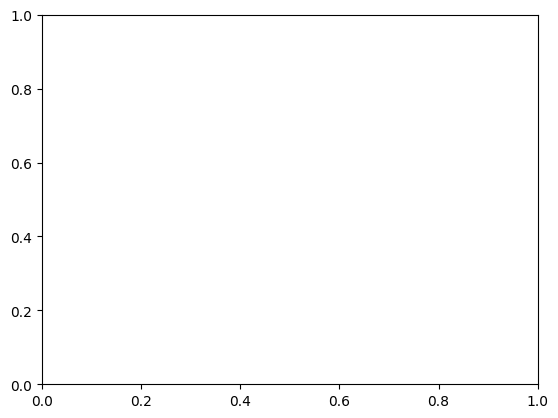

In [33]:
# Dibuja el scatter plot con los clusters asignados
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='viridis')
plt.show()



In [34]:
plt.show()  # Muestra el scatter plot final